In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.neighbors import KNeighborsRegressor
from mpl_toolkits.mplot3d import Axes3D  

To recap:
  - Integrals are estimated by Reimann sums. 
  - Riemann sums are sums of a product of a value of a function and a measure on the space aroud it.
  - When we can access all a function's values, we can get an arbittrarily good estimate. 
  - When only select values are known, we need to take care in how we add them up. 

## Enter ML

We've seen that estimating an integral from a nonuniform distribution of points by taking a simple average ca be wildly off. Refining partitions is better, but a bit messy, and potentially discards a lot of iformation. 

A different approach is to recogize that what we would really want to do is predict unknown values of a function from known values. This very problem is the basis (and, perhaps, the total) of the field of **machine learning**. The mechanisms behind makig those predictions are what make ML such a rich, sophisticated, and exciting field. 

We'll use our simple problem to give a (very) small taste. 

Let's redefine our function and data sets from [Part 2](Part2).

In [2]:
from part2 import f

np.random.seed(1066)
pts = .45*np.random.randn(200,2) % 2
d1 = pd.DataFrame(pts,columns=['x','y'])
d1['z'] = f(d1.x,d1.y)

np.random.seed(1415)
pts2 = (.55*np.random.randn(770,2) + np.array([[1.5,.5]])) % 2
d2 = pd.DataFrame(pts2,columns=['x','y'])
d2['z'] = f(d2.x,d2.y)


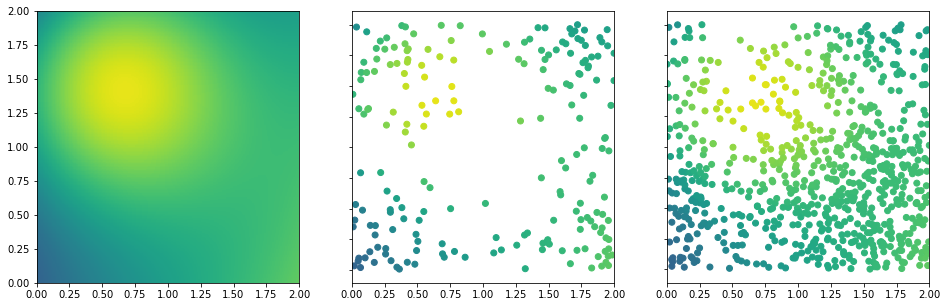

In [3]:
fig,axs = plt.subplots(1,3,figsize=(16,5))
x = y = np.linspace(0,2,200)
X,Y = np.meshgrid(x,y)
axs[0].pcolormesh(X,Y,f(X,Y),vmin=-1,vmax=3)
axs[1].scatter(d1.x,d1.y,c=d1.z,vmin=-1,vmax=3)
axs[2].scatter(d2.x,d2.y,c=d2.z,vmin=-1,vmax=3);
for ax in axs:
    ax.set_xlim((0,2))
    ax.label_outer();
plt.savefig("fdots1.png",transparent=True)

To "fill in the blanks", we'll employ a powerful, open-source ml library call `scikit-learn` (co-authored by Columbia's own Andreas Mueller). 

First we pick a model; we're trying to predict a continuos variable, so we want a *regressor* (models that predict discrete variables are called *classifiers*). 

In [4]:
neigh = KNeighborsRegressor(n_neighbors=1)

You might guess by the name, but this model predicts value for a function by simply picking that of the nearest know value. 

Next we fit (or train) the model on our known data.

In [5]:
neigh.fit(d1[['x','y']],d1.z)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                    weights='uniform')

In [6]:
# This is a way to get the model to act incely o umpy arrays. There are surely better ways.

knn = np.vectorize(lambda x,y: neigh.predict([[x,y]]))

In [7]:
# The magic. May take a while. 

Z1 = knn(X,Y)

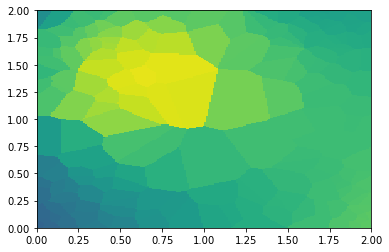

In [8]:
plt.pcolormesh(X,Y,Z1,vmin=-1, vmax=3);

**Exercise** Retrain the model on the secod data set `d2`. Plot the resulting function.

Then compare the actual integral with those on the models. 

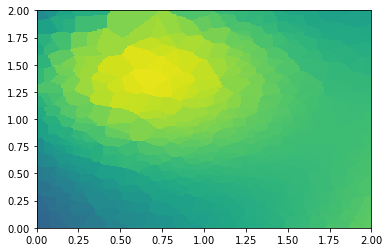

In [9]:
### BEGIN SOLUTION
neigh.fit(d2[['x','y']],d2.z)
Z2 = knn(X,Y)
plt.pcolormesh(X,Y,Z2,vmin=-1, vmax=3);
### END SOLUTION

In [10]:
from scipy.integrate import dblquad
print(f"Actual:\t{dblquad(f,0,2,0,2)[0]:0.05}\nd1:\t{4*np.mean(Z1):0.05}\nd1:\t{4*np.mean(Z2):0.05}")

Actual:	7.2072
d1:	7.1331
d1:	7.19


## Into the Freezer

**Main problem.** You run a small lab analyzing ice cores from the Good Humor Glacier in Greenland. You keep the sample in a large $2\text{m}\times 2\text{m}\times 3\text{m}$ freezer. To make sure it is keeping the samples properly cold, you need to know its average temperature.
You task your grad student with measuring this and send them in with a digital thermometer. 

They return with a data set of 60 temperature readings and report and an average reading of $20.565^\circ$. You take one look at the data and know immediately it is bunk. How? 

In [11]:
data = pd.read_csv("https://drew.youngren.nyc/ppds/freezer-temps.csv")
data.columns = ['x','y','z','temp']

In [12]:
data.head()

,x,y,z,temp
0,1,82,268,11.0
1,10,147,28,10.2
2,29,190,85,11.8
3,48,145,9,10.3
4,50,92,36,10.7


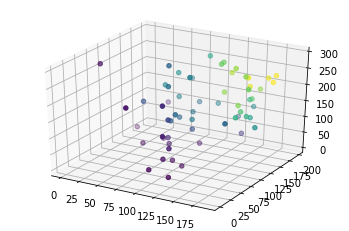

In [13]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter3D(data.x,data.y,data.z,c=data.temp);

### Exercise

Use techiques from these notebooks to make the best prediction possible for the actual average temperature of the freezer.

Don't forget $$f_\text{avg} = \frac{1}{\operatorname{Vol}(E)} \iiint_E f\, dV$$

In [62]:
### BEGIN SOLUTION
### END SOLUTION

You might peek at the scikit-learn documetation to tweak the [KNN regressor](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsRegressor.html) or [pick another model entirely](https://scikit-learn.org/stable/supervised_learning.html).